In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
# Ignore deprecation warnings in sklearn
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
df = pd.read_csv('Jobs_NYC_Postings.csv')


In [3]:
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-MAY-2024,01/23/2024,03/04/2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10/03/2023,NaN,11/29/2023,03/04/2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02/01/2024,NaN,02/01/2024,03/04/2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04/04/2023,NaN,04/04/2023,03/04/2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02/06/2024,05-JUN-2024,02/21/2024,03/04/2024


In [4]:
df.shape

(5120, 30)

In [5]:
df.describe()

,Job ID,# Of Positions,Salary Range From,Salary Range To,Recruitment Contact
count,5120.000000,5120.000000,5120.000000,5120.000000,0.0
mean,598721.366211,2.070898,64625.224123,89978.575734,NaN
std,28274.636161,5.799227,31378.516179,46732.299939,NaN
min,469953.000000,1.000000,0.000000,15.000000,NaN
25%,586358.000000,1.000000,51869.000000,64608.000000,NaN
50%,607060.000000,1.000000,62397.000000,85147.000000,NaN
75%,621404.000000,1.000000,80557.000000,113550.000000,NaN
max,628806.000000,150.000000,225000.000000,252165.000000,NaN


In [6]:
df

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-MAY-2024,01/23/2024,03/04/2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10/03/2023,NaN,11/29/2023,03/04/2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02/01/2024,NaN,02/01/2024,03/04/2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04/04/2023,NaN,04/04/2023,03/04/2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02/06/2024,05-JUN-2024,02/21/2024,03/04/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,570670,DEPT OF HEALTH/MENTAL HYGIENE,External,1,Public Health Nurse III / Communicable Disease...,PUBLIC HEALTH NURSE,Competitive-1,51011,03,Constituent Services & Community Programs Health,...,"**Must follow all safety, security, Blood-born...",Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City Residency is not required for th...,01/24/2023,NaN,11/16/2023,03/04/2024
5116,552517,DEPARTMENT OF TRANSPORTATION,External,1,Engineer-In-Charge,CIVIL ENGINEER,Competitive-1,20215,02,"Engineering, Architecture, & Planning",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,35 Hours,55 Water St Ny Ny,NaN,New York City Residency is not required for th...,09/23/2022,NaN,09/29/2022,03/04/2024
5117,567353,DEPARTMENT OF CORRECTION,External,8,"Assistant Commissioner, Facility Operations",FACILITY SUPERVISOR (CORRECTIO,Non-Competitive-5,95090,M4,"Public Safety, Inspections, & Enforcement",...,The City of New York offers a comprehensive be...,For City employees: Go to Employee Self-Servic...,NaN,NaN,NaN,New York City residency is generally required ...,01/05/2023,NaN,01/26/2023,03/04/2024
5118,612424,BRONX DISTRICT ATTORNEY,Internal,1,Human Trafficking Victim's Advocate,COMMUNITY COORDINATOR,Non-Competitive-5,56058,00,Constituent Services & Community Programs Heal...,...,NaN,"For City employees, to complete your applicati...",NaN,NaN,NaN,City Residency is not required for this position,10/20/2023,19-OCT-2024,10/20/2023,03/04/2024


In [7]:
df.dtypes

Job ID                             int64
Agency                            object
Posting Type                      object
# Of Positions                     int64
Business Title                    object
Civil Service Title               object
Title Classification              object
Title Code No                     object
Level                             object
Job Category                      object
Full-Time/Part-Time indicator     object
Career Level                      object
Salary Range From                float64
Salary Range To                  float64
Salary Frequency                  object
Work Location                     object
Division/Work Unit                object
Job Description                   object
Minimum Qual Requirements         object
Preferred Skills                  object
Additional Information            object
To Apply                          object
Hours/Shift                       object
Work Location 1                   object
Recruitment Cont

In [8]:
df.info

<bound method DataFrame.info of       Job ID                         Agency Posting Type  # Of Positions  \
0     623668  DEPT OF HEALTH/MENTAL HYGIENE     External               1   
1     608193  DEPT OF DESIGN & CONSTRUCTION     Internal               1   
2     625094  DEPT OF DESIGN & CONSTRUCTION     Internal               1   
3     580593   DEPARTMENT OF TRANSPORTATION     External               1   
4     624937  DEPT OF HEALTH/MENTAL HYGIENE     External               1   
...      ...                            ...          ...             ...   
5115  570670  DEPT OF HEALTH/MENTAL HYGIENE     External               1   
5116  552517   DEPARTMENT OF TRANSPORTATION     External               1   
5117  567353       DEPARTMENT OF CORRECTION     External               8   
5118  612424        BRONX DISTRICT ATTORNEY     Internal               1   
5119  589902  DEPT OF DESIGN & CONSTRUCTION     Internal               3   

                                         Business Title

In [9]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
df_jobs_missing = pd.concat([missing_values,missing_percent],axis=1, keys=['missing_values','missing_percent %'])
df_jobs_missing

,missing_values,missing_percent %
Recruitment Contact,5120,1.000000
Post Until,3616,0.706250
Work Location 1,3229,0.630664
Hours/Shift,3210,0.626953
Additional Information,1862,0.363672
Preferred Skills,1219,0.238086
To Apply,426,0.083203
Full-Time/Part-Time indicator,117,0.022852
Minimum Qual Requirements,43,0.008398
Job ID,0,0.000000


In [10]:
df_jobs_re = df.rename(columns={
    'Job ID':'job_id',
    'Posting Type':'posting_type',
    '# Of Positions':'num_position',
    'Business Title':'business_title',
    'Civil Service Title':'civil_ser_title',
    'Title Code No':'title_code_no',
    'Job Category':'job_category',
    'Full-Time/Part-Time indicator':'full_part_type',
    'Salary Range From':'salary_min',
    'Salary Range To':'salary_max',
    'Salary Frequency':'payment_cycle',
    'Work Location':'work_location',
    'Division/Work Unit':'department',
    'Job Description':'job_description',
    'Minimum Qual Requirements':'min_requirement',
    'Preferred Skills':'prefer_skills',
    'Additional Information':'additional_info',
    'To Apply':'to_apply',
    'Hours/Shift':'rotation',
    'Work Location 1':'Work_Location_extra',
    'Recruitment Contact':'contact',
    'Residency Requirement':'residency_requirement',
    'Posting Date':'post_date',
    'Post Until':'post_end',
    'Posting Updated':'updated_at',
    'Process Date':'process_date'
    
}
)

df_jobs_re.head()

,job_id,Agency,posting_type,num_position,business_title,civil_ser_title,Title Classification,title_code_no,Level,job_category,...,additional_info,to_apply,rotation,Work_Location_extra,contact,residency_requirement,post_date,post_end,updated_at,process_date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-MAY-2024,01/23/2024,03/04/2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10/03/2023,NaN,11/29/2023,03/04/2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02/01/2024,NaN,02/01/2024,03/04/2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04/04/2023,NaN,04/04/2023,03/04/2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02/06/2024,05-JUN-2024,02/21/2024,03/04/2024


In [11]:
sum(df_jobs_re.duplicated())

19

In [12]:
df_jobs_re.drop_duplicates(inplace=True)
sum(df_jobs_re.duplicated()), df_jobs_re.shape

(0, (5101, 30))

In [13]:
## EDA

In [14]:
df_jobs_re.job_id.nunique()

2626

In [15]:
## 2982 are original but the 2626 are unique and rest are duplicates

In [16]:
df_test=df_jobs_re[['job_id','posting_type']]

In [17]:
df_test_count=df_test.groupby('job_id').count()#grouping all job ids and spliting the data of job id as internal and external ids
df_test_internal=df_test[df_test['posting_type']=='Internal']
df_test_external=df_test[df_test['posting_type']=='External']
len(df_test_count[df_test_count['posting_type']==1]),len(df_test_external),len(df_test_internal)#taking length of both

(156, 2507, 2594)

In [18]:
df_all=df_test_internal.merge(df_test_external,on='job_id').merge(df_test_count,on='job_id')
len(df_all)# merging the lengths and jobids and then taking total count

2475

In [19]:
df_all.head()

,job_id,posting_type_x,posting_type_y,posting_type
0,608193,Internal,External,2
1,625094,Internal,External,2
2,628726,Internal,External,2
3,621367,Internal,External,2
4,627742,Internal,External,2


In [20]:
duplicated_jobs=df_all['job_id'].to_list()

In [21]:
df_jobs_re['flag_duplication']= df_jobs_re.apply(lambda x: int(x['job_id'] in duplicated_jobs), axis=1)
df_jobs_re['posting_type']= np.where((df_jobs_re['flag_duplication'] ==1),"int_ext",df_jobs_re['posting_type'])
df_jobs_re.head()#checking for duplicates and elimnating them 

,job_id,Agency,posting_type,num_position,business_title,civil_ser_title,Title Classification,title_code_no,Level,job_category,...,to_apply,rotation,Work_Location_extra,contact,residency_requirement,post_date,post_end,updated_at,process_date,flag_duplication
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,int_ext,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-MAY-2024,01/23/2024,03/04/2024,1
1,608193,DEPT OF DESIGN & CONSTRUCTION,int_ext,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10/03/2023,NaN,11/29/2023,03/04/2024,1
2,625094,DEPT OF DESIGN & CONSTRUCTION,int_ext,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02/01/2024,NaN,02/01/2024,03/04/2024,1
3,580593,DEPARTMENT OF TRANSPORTATION,int_ext,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04/04/2023,NaN,04/04/2023,03/04/2024,1
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,int_ext,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02/06/2024,05-JUN-2024,02/21/2024,03/04/2024,1


In [22]:
df_jobs_re.drop_duplicates(inplace=True)
sum(df_jobs_re.duplicated()), df_jobs_re.shape# dropping the duplicate values and reshaping the dataset after cleaning the data with respect to posting type and flag duplication 

(0, (2641, 31))

In [23]:
## remove the flag column, 
df_jobs_re.drop(['flag_duplication'], axis=1,inplace=True)
df_jobs_re.shape

(2641, 30)

In [24]:
df_jobs_re.Agency.nunique()#checking for the unique values in the agencis column

59

In [25]:
df_jobs_re.Agency.value_counts()

Agency
DEPT OF ENVIRONMENT PROTECTION    502
DEPT OF HEALTH/MENTAL HYGIENE     385
HRA/DEPT OF SOCIAL SERVICES       360
DEPARTMENT OF TRANSPORTATION      239
DEPT OF DESIGN & CONSTRUCTION     226
NYC HOUSING AUTHORITY             157
BRONX DISTRICT ATTORNEY            84
DEPARTMENT OF CORRECTION           62
FINANCIAL INFO SVCS AGENCY         59
OFFICE OF THE COMPTROLLER          45
HOUSING PRESERVATION & DVLPMNT     42
ADMIN FOR CHILDREN'S SVCS          39
DEPT. OF HOMELESS SERVICES         36
DEPT OF CITYWIDE ADMIN SVCS        34
DEPARTMENT OF FINANCE              31
OFFICE OF MANAGEMENT & BUDGET      24
DEPT OF PARKS & RECREATION         23
DISTRICT ATTORNEY-MANHATTAN        22
TAXI & LIMOUSINE COMMISSION        22
CAMPAIGN FINANCE BOARD             19
CONSUMER AND WORKER PROTECTION     16
OFFICE OF EMERGENCY MANAGEMENT     15
LAW DEPARTMENT                     15
DEPARTMENT OF CITY PLANNING        15
DEPT OF YOUTH & COMM DEV SRVS      14
DEPARTMENT FOR THE AGING           12
FIRE 

<Axes: ylabel='count'>

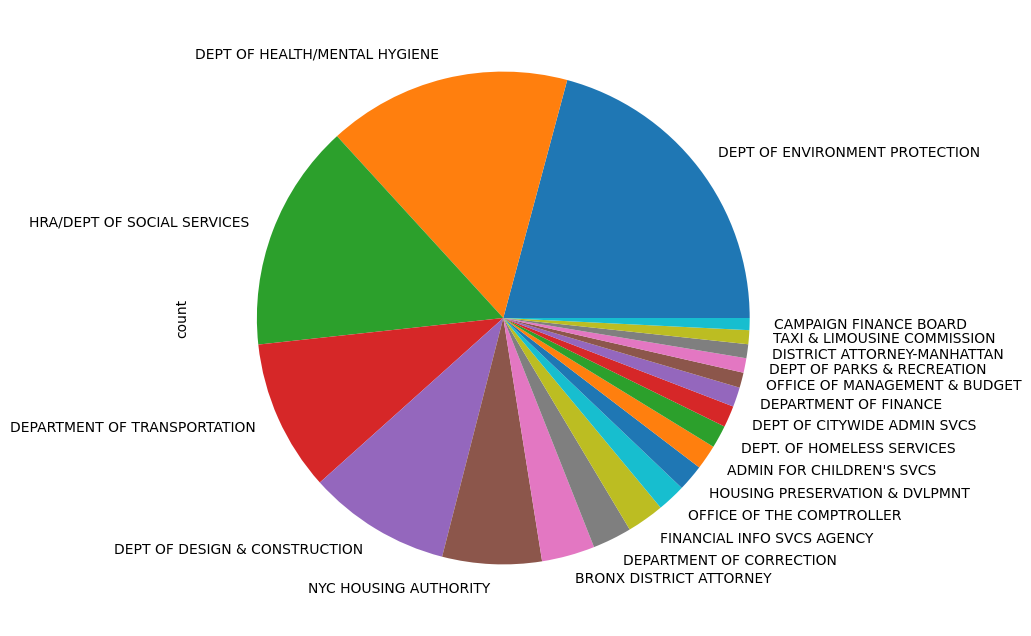

In [26]:
df_jobs_re.Agency.value_counts().head(20).plot(kind='pie',figsize=(8,8)) #plotting the agencies and their corresponding value count

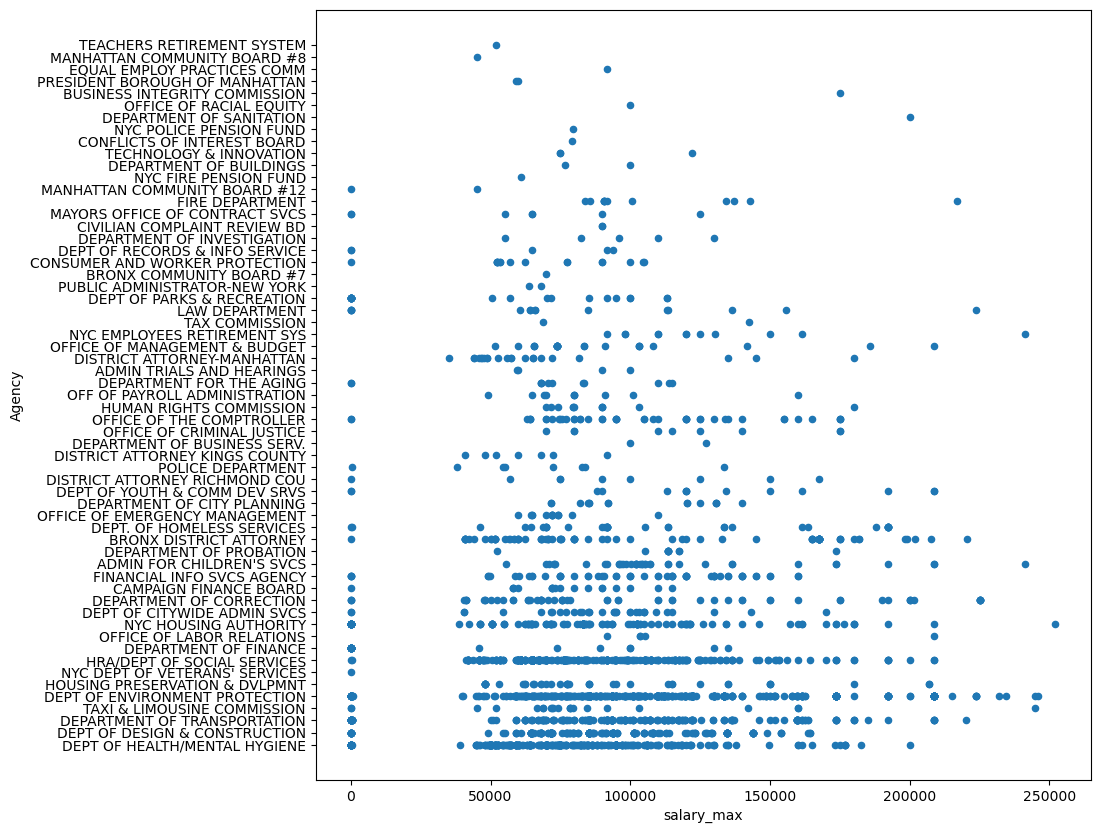

In [27]:
df_jobs_re.plot(y='Agency',x='salary_max', kind='scatter',figsize=(10,10));

In [28]:
df_jobs_re.posting_type.value_counts()

posting_type
int_ext     2485
Internal     119
External      37
Name: count, dtype: int64

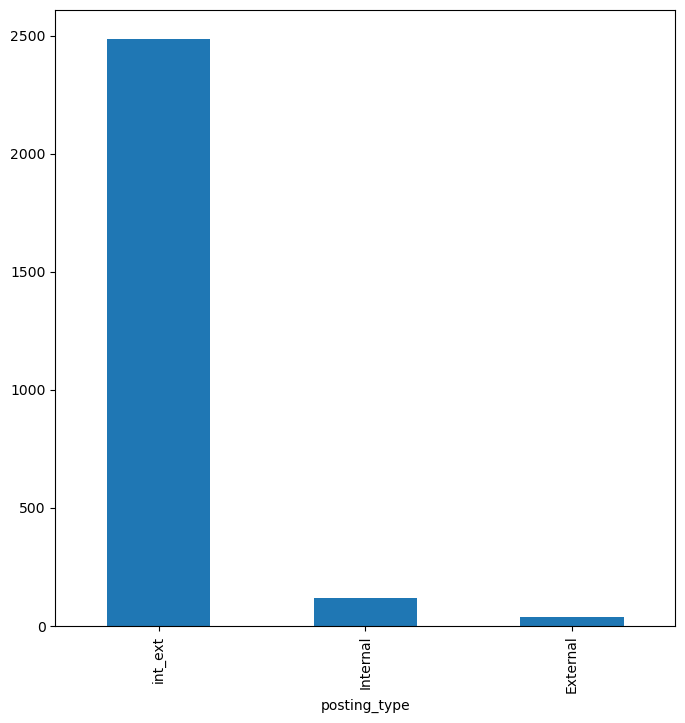

In [29]:
df_jobs_re.posting_type.value_counts().plot(kind='bar',figsize=(8,8));

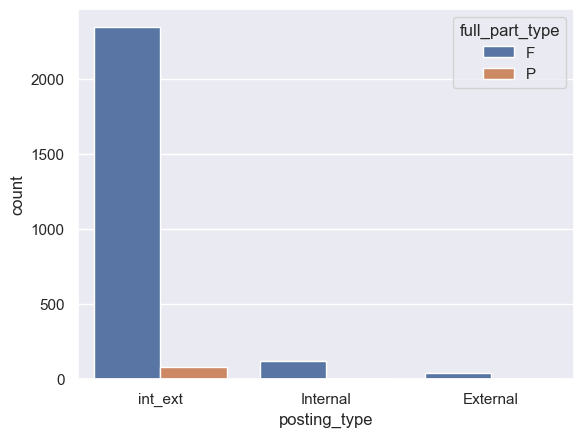

In [30]:
sns.set_theme(style="darkgrid")
sns.countplot(x='posting_type', data=df_jobs_re,hue="full_part_type");

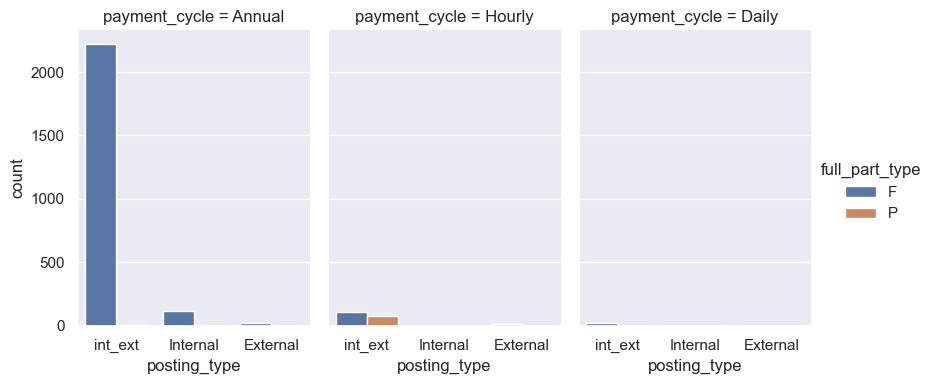

In [31]:
sns.catplot(x="posting_type", hue="full_part_type", col="payment_cycle",
                data=df_jobs_re, kind="count",
                height=4, aspect=.7);

In [32]:
columns_jobs=['Level', 'full_part_type', 'salary_min', 'salary_max', 'rotation','payment_cycle']

In [33]:
for col in columns_jobs:
    print("Value analysis for column: {}".format(col))
    print("number of unique values: {}".format(df_jobs_re[col].nunique()))
    print(df_jobs_re[col].value_counts())

Value analysis for column: Level
number of unique values: 18
Level
00    1080
02     513
01     388
03     301
M4      91
M2      67
04      51
M3      47
M1      47
M5      15
4A      12
M6      12
M7       5
MY       4
4B       2
3A       2
M8       2
1B       2
Name: count, dtype: int64
Value analysis for column: full_part_type
number of unique values: 2
full_part_type
F    2501
P      81
Name: count, dtype: int64
Value analysis for column: salary_min
number of unique values: 559
salary_min
59116.0000    90
62370.0000    71
58700.0000    65
58682.0000    47
64922.0000    47
              ..
94070.0000     1
75666.0000     1
66822.0000     1
67677.0000     1
40.5862        1
Name: count, Length: 559, dtype: int64
Value analysis for column: salary_max
number of unique values: 748
salary_max
208826.0000    41
173486.0000    39
71726.0000     38
93587.0000     37
91768.0000     37
               ..
112772.0000     1
53000.0000      1
200.7739        1
69330.0000      1
136951.0000     1

In [34]:
## the full_part_type has few missing values
## if payment is anuual will consider is full-time and if payment is hourly I will consider it part time as approximaion
df_jobs_re['full_part_type']= np.where((df_jobs_re['full_part_type'].isnull()) & (df_jobs_re['payment_cycle'] =='Annual'),
                                       'F',df_jobs_re['full_part_type'])
df_jobs_re['full_part_type']= np.where((df_jobs_re['full_part_type'].isnull()) & (df_jobs_re['payment_cycle'] =='Hourly'),
                                       'P',df_jobs_re['full_part_type'])
df_jobs_re['full_part_type'].value_counts()

full_part_type
F    2555
P      85
Name: count, dtype: int64

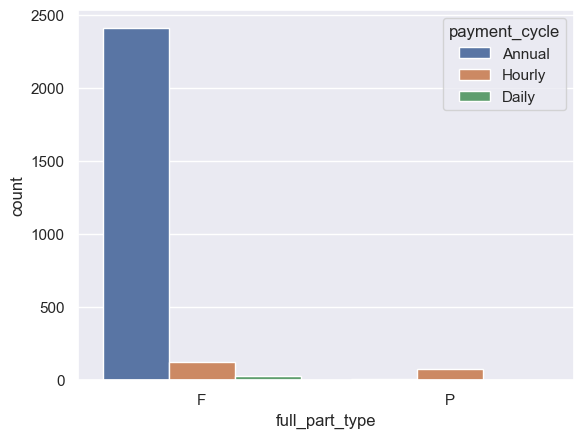

In [35]:
sns.countplot(x='full_part_type', data=df_jobs_re,hue="payment_cycle" );

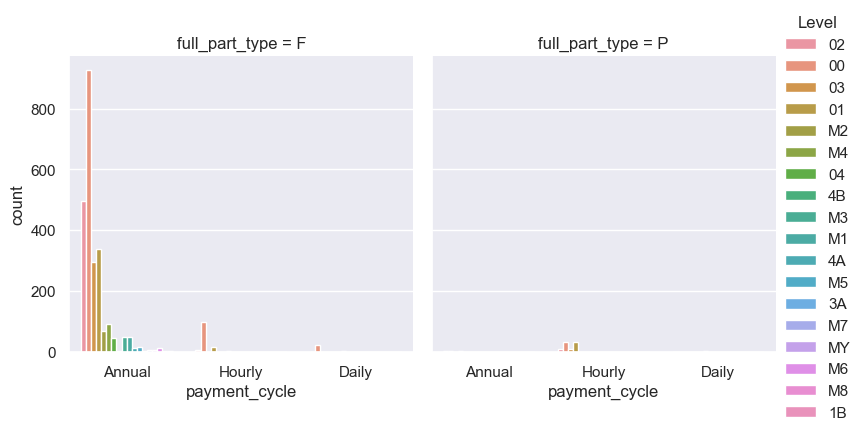

In [36]:
sns.catplot(x="payment_cycle", hue="Level", col="full_part_type",
                data=df_jobs_re, kind="count",
                height=4);


In [37]:
## the daily salaries are very few so will convert all to hourly
df_jobs_re['salary_min']= np.where((df_jobs_re['payment_cycle'] =='Daily'),df_jobs_re['salary_min']/8,df_jobs_re['salary_min'])
df_jobs_re['salary_max']= np.where((df_jobs_re['payment_cycle'] =='Daily'),df_jobs_re['salary_max']/8,df_jobs_re['salary_max'])

## replace the payment_cycle to hourly
df_jobs_re['payment_cycle'].replace('Daily','Hourly',inplace=True)

In [38]:
## I am going to calculate few features to compare the salaries

df_jobs_re['salary_avg']=(df_jobs_re['salary_min']+df_jobs_re['salary_max'])/2
df_jobs_re.head()

,job_id,Agency,posting_type,num_position,business_title,civil_ser_title,Title Classification,title_code_no,Level,job_category,...,to_apply,rotation,Work_Location_extra,contact,residency_requirement,post_date,post_end,updated_at,process_date,salary_avg
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,int_ext,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-MAY-2024,01/23/2024,03/04/2024,88694.0
1,608193,DEPT OF DESIGN & CONSTRUCTION,int_ext,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10/03/2023,NaN,11/29/2023,03/04/2024,96626.0
2,625094,DEPT OF DESIGN & CONSTRUCTION,int_ext,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02/01/2024,NaN,02/01/2024,03/04/2024,75043.5
3,580593,DEPARTMENT OF TRANSPORTATION,int_ext,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04/04/2023,NaN,04/04/2023,03/04/2024,66851.0
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,int_ext,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02/06/2024,05-JUN-2024,02/21/2024,03/04/2024,99223.5


In [39]:
##   Adding 2 add 2 more features to compare salaries on same scale
## so for hourly rate, we calculate the yearly equivalent salary
## for yearly salary, we calculate the hourly equivalent rate

df_jobs_re['yearly_salary_eq']= np.where(
    (df_jobs_re['payment_cycle'] =='Hourly'),
    df_jobs_re['salary_avg']*8*5*52,
    df_jobs_re['salary_avg'])

df_jobs_re['hourly_rate_eq']= np.where(
    (df_jobs_re['payment_cycle'] =='Annual'),
    df_jobs_re['salary_avg']/8/5/52,
    df_jobs_re['salary_avg'])

df_jobs_re.head()

,job_id,Agency,posting_type,num_position,business_title,civil_ser_title,Title Classification,title_code_no,Level,job_category,...,Work_Location_extra,contact,residency_requirement,post_date,post_end,updated_at,process_date,salary_avg,yearly_salary_eq,hourly_rate_eq
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,int_ext,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,...,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-MAY-2024,01/23/2024,03/04/2024,88694.0,88694.0,42.641346
1,608193,DEPT OF DESIGN & CONSTRUCTION,int_ext,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",...,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10/03/2023,NaN,11/29/2023,03/04/2024,96626.0,96626.0,46.454808
2,625094,DEPT OF DESIGN & CONSTRUCTION,int_ext,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",...,NaN,NaN,New York City Residency is not required for th...,02/01/2024,NaN,02/01/2024,03/04/2024,75043.5,75043.5,36.078606
3,580593,DEPARTMENT OF TRANSPORTATION,int_ext,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",...,To be determine.,NaN,New York City residency is generally required ...,04/04/2023,NaN,04/04/2023,03/04/2024,66851.0,66851.0,32.139904
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,int_ext,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,...,NaN,NaN,New York City residency is generally required ...,02/06/2024,05-JUN-2024,02/21/2024,03/04/2024,99223.5,99223.5,47.703606


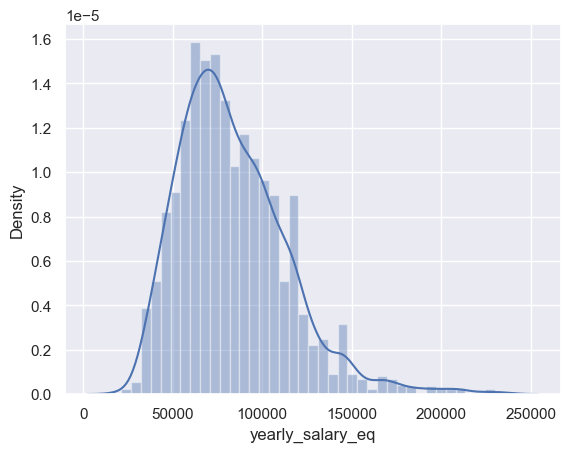

In [40]:
sns.distplot(df_jobs_re['yearly_salary_eq']);

In [41]:
print("Skewness: %f" % df_jobs_re['yearly_salary_eq'].skew())
print("Kurtosis: %f" % df_jobs_re['yearly_salary_eq'].kurt())

Skewness: 1.077343
Kurtosis: 2.012405


In [42]:
##the curve is normally distributed 

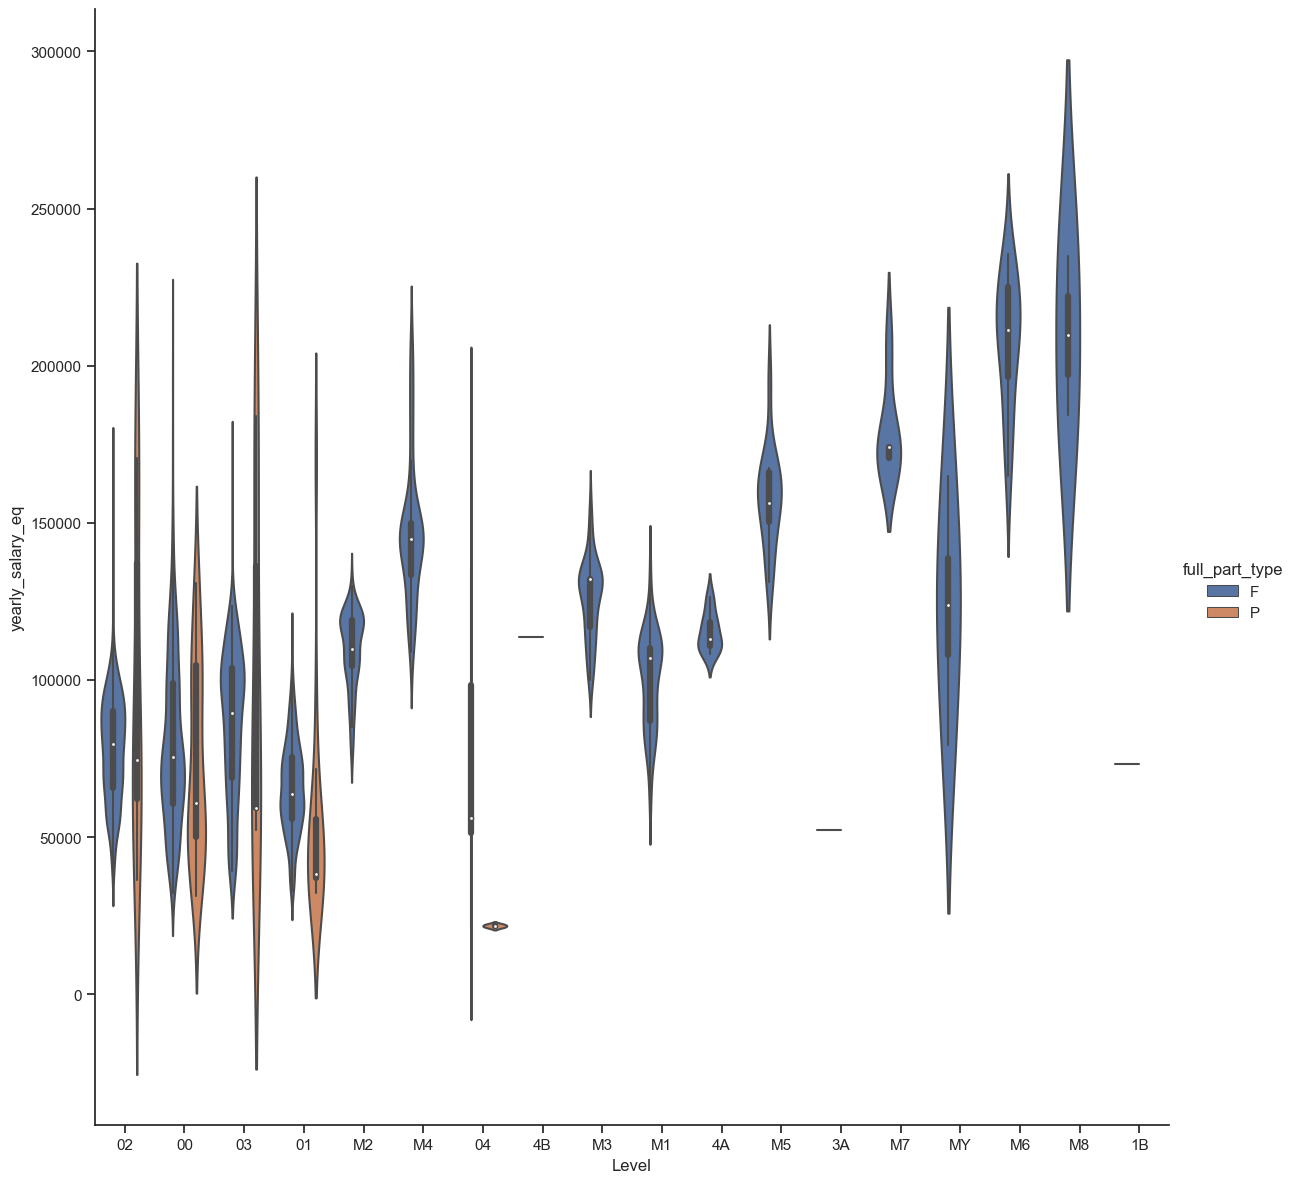

In [43]:
sns.set_theme(style="ticks")
sns.catplot(x="Level", y="yearly_salary_eq", hue="full_part_type",
                data=df_jobs_re, kind="violin",
                height=12);

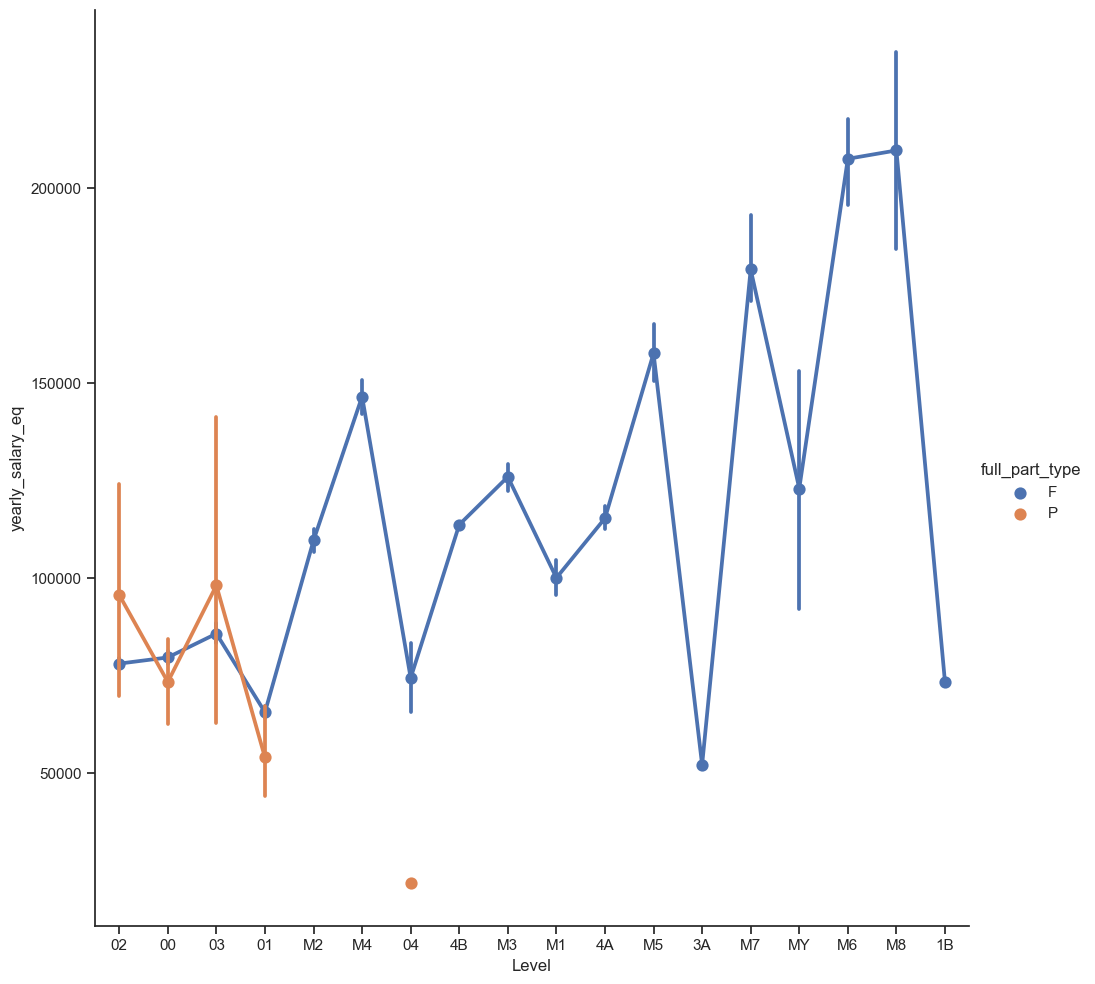

In [44]:
sns.catplot(x="Level", y="yearly_salary_eq", hue="full_part_type",
                data=df_jobs_re, kind="point",
                height=10);

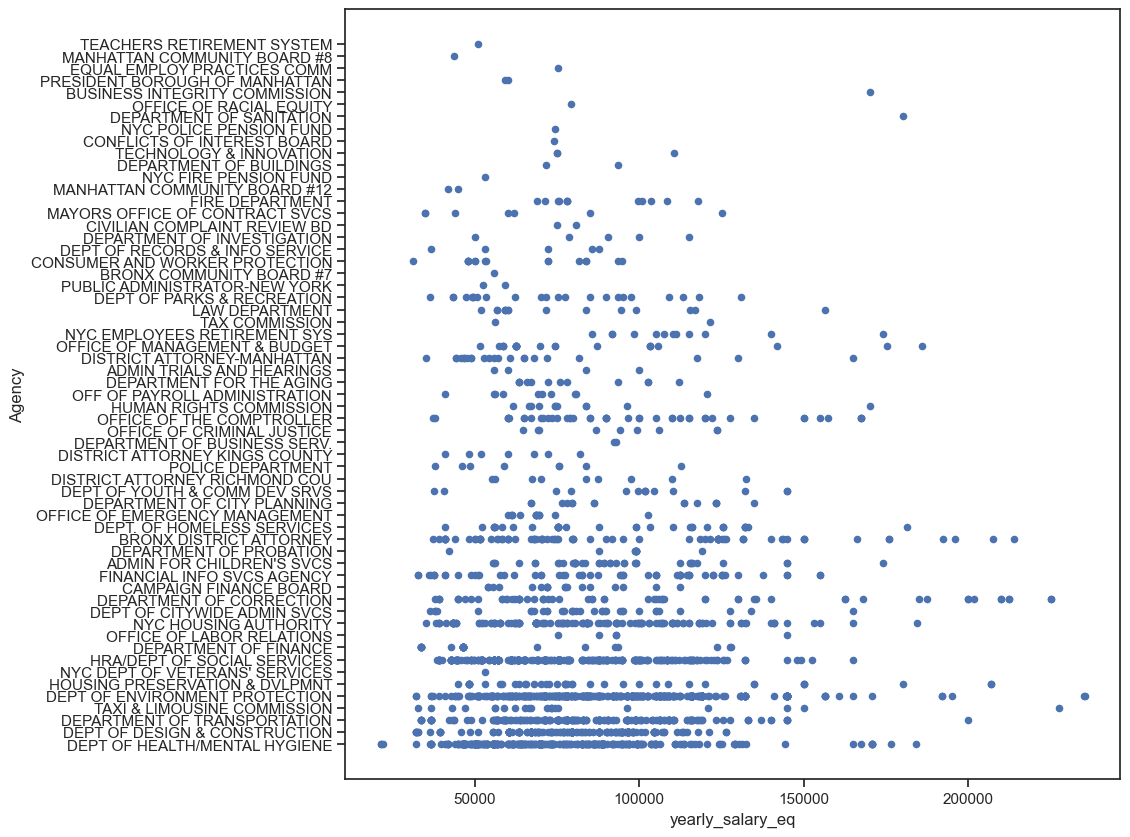

In [45]:
df_jobs_re.plot(y='Agency',x='yearly_salary_eq', kind='scatter',figsize=(10,10));

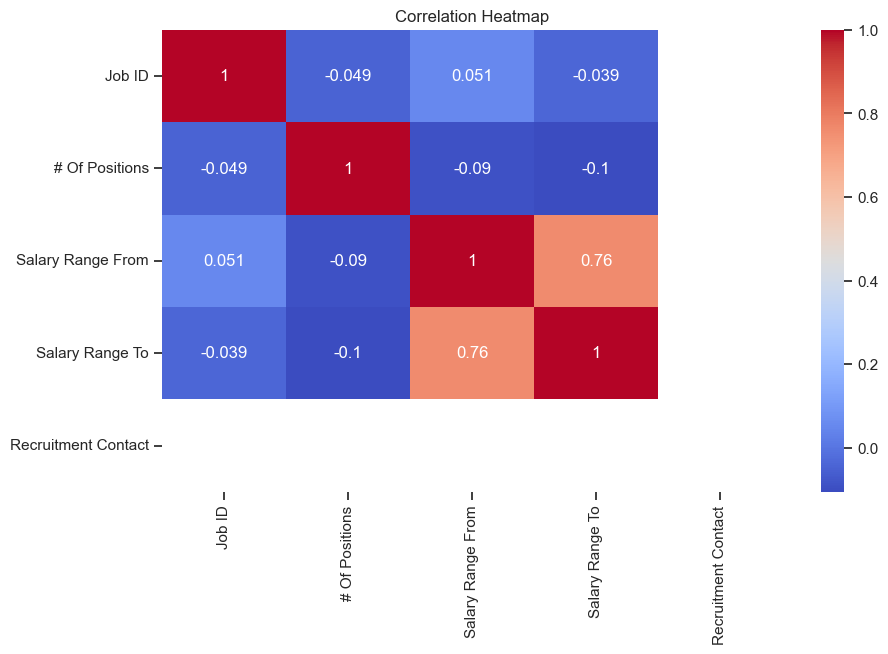

In [46]:
# Select numeric columns only
numeric_columns = df.select_dtypes(include=['number'])

# Correlation heatmap for numeric columns
correlation = numeric_columns.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

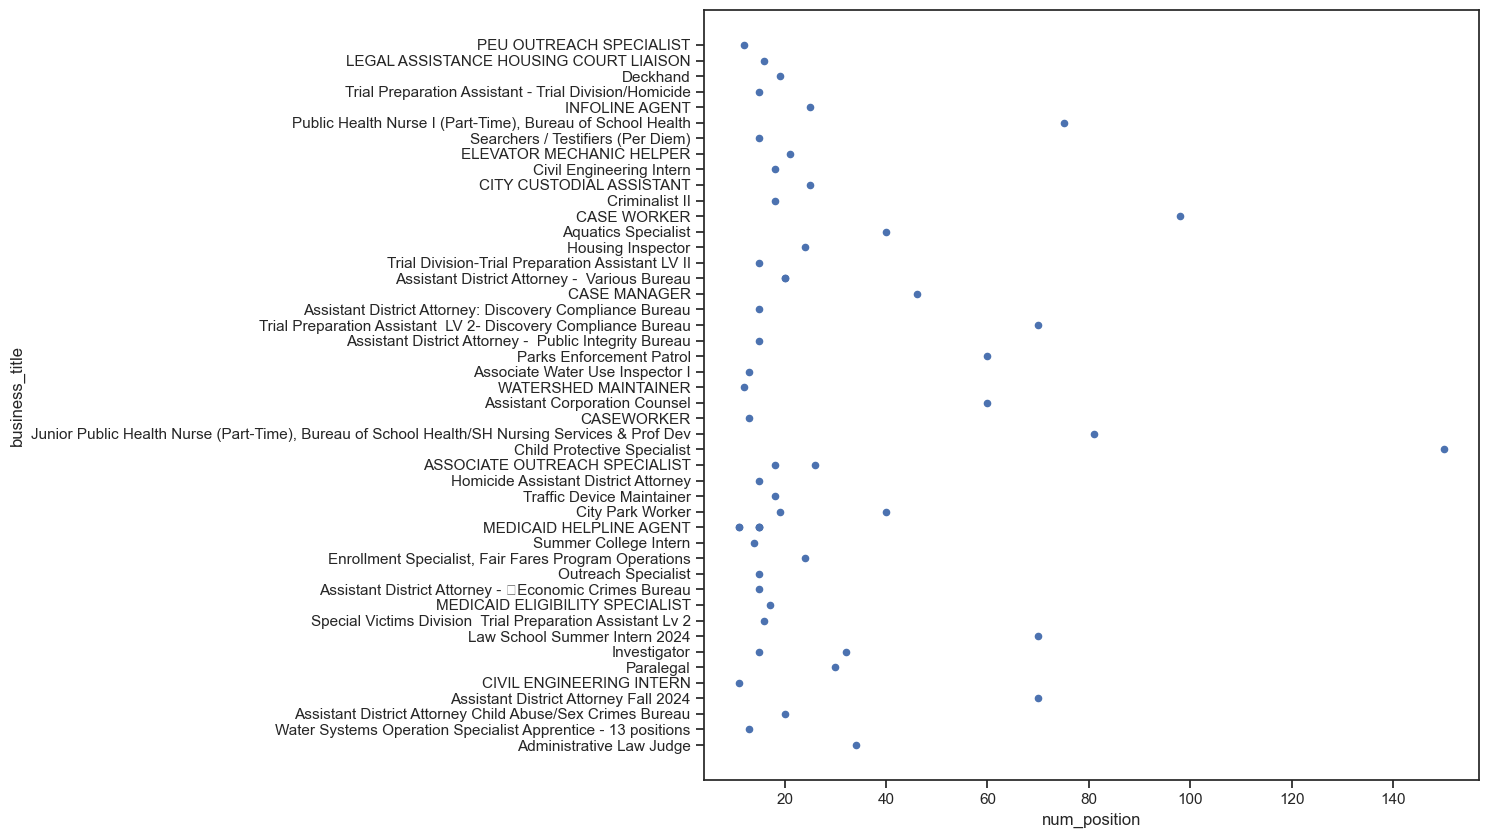

In [47]:
df_m = df_jobs_re[df_jobs_re['num_position']>10]
df_m.plot(y='business_title',x='num_position', kind='scatter',figsize=(10,10));#checking the number of positions greater than 10

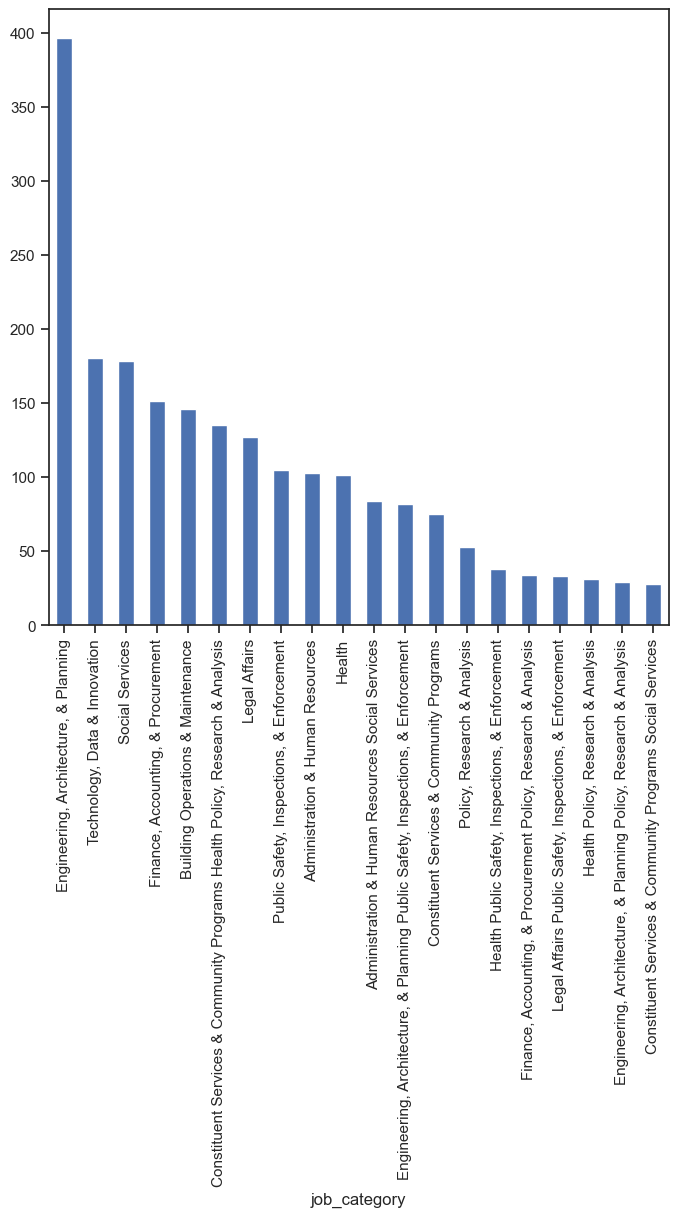

In [48]:
df_jobs_re.job_category.value_counts().head(20).plot(kind='bar',figsize=(8,8));

# #LINEAR REGRESSION MODEL

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming df_jobs_re is your DataFrame
X = df_jobs_re.iloc[:, :-1]
Y = df_jobs_re.iloc[:, -1]

# Ensure X is a DataFrame
X = pd.DataFrame(X, columns=df_jobs_re.columns[:-1])

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Identify numerical columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),  # Handle missing values in numerical columns
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)  # Handle missing values and encode categorical columns
    ],
    remainder='passthrough'  # Leave the rest of the columns untouched
)

# Create a pipeline that first preprocesses the data and then fits the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R^2 Score: {r2:.4f}')


Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
Mean Absolute Error (MAE): 0.00
R^2 Score: 1.0000


MSE: 0.02
RMSE: 0.14
MAE: 0.06
R^2 Score: 0.9999


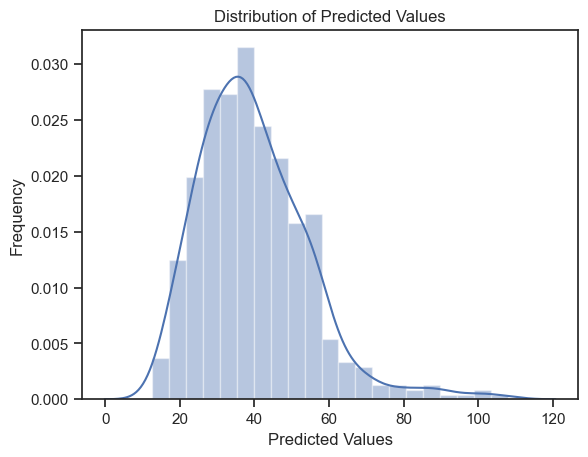

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# pipeline with preprocessing and Linear Regression model
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2 Score: {r2:.4f}")

# Visualizing the distribution of predictions
sns.distplot(y_pred)
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()


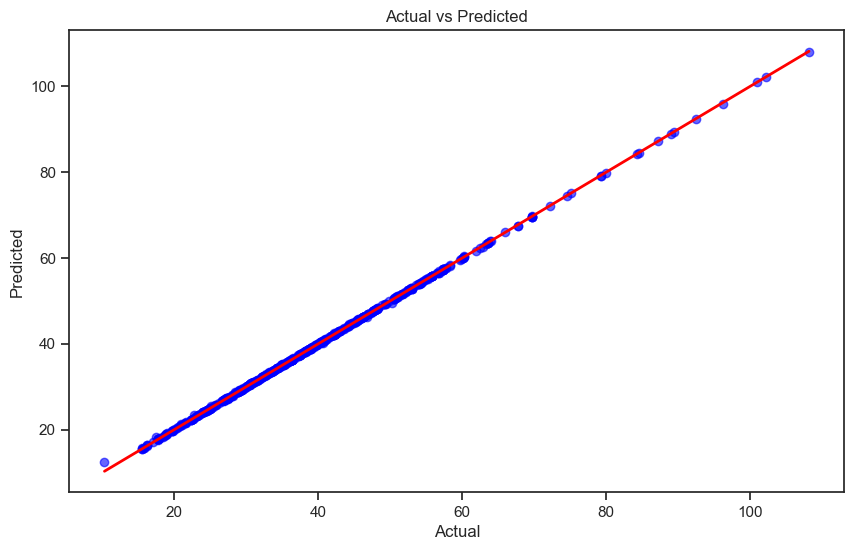

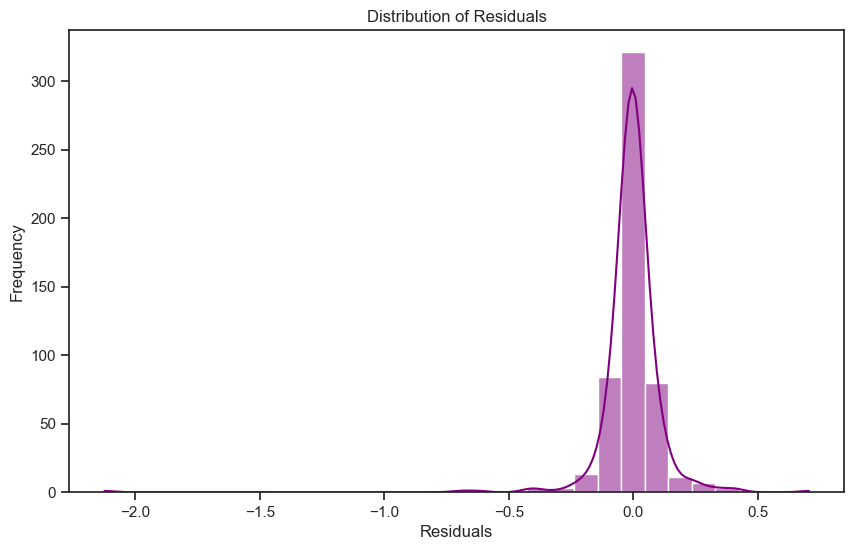

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Plot the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# # DECISION TREE MODEL 

In [53]:
from sklearn.tree import DecisionTreeRegressor

[29.55817308 34.61538462 90.14423077 44.15865385 29.03581731]
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.17
Mean Absolute Error (MAE): 0.04
R^2 Score: 0.9999


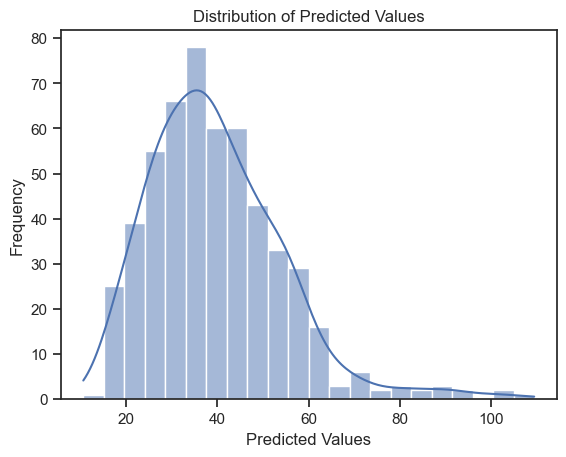

In [54]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fiting the model
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# the first few predictions
print(y_pred[:5])


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.4f}")

# Visualize the distribution of predictions
sns.histplot(y_pred, kde=True)
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()

# # RANDOM FOREST MODEL 

In [55]:
from sklearn.ensemble import RandomForestRegressor

[29.56545192 34.61559615 90.00421154 44.16531731 28.91903137]
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15
Mean Absolute Error (MAE): 0.04
R^2 Score: 0.9999


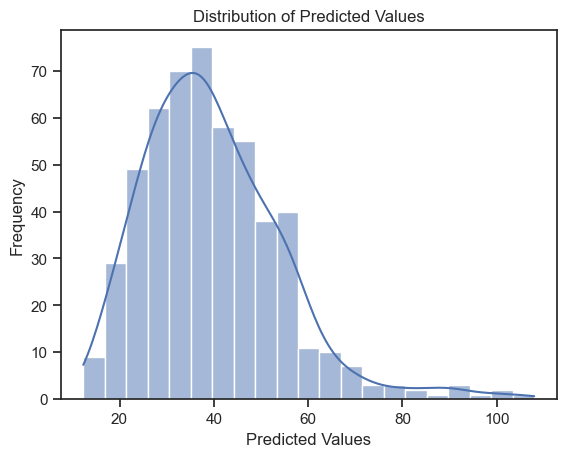

In [56]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fitting the model
model.fit(X_train, y_train)

# making predictions
y_pred = model.predict(X_test)

# first few predictions
print(y_pred[:5])


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.4f}")


sns.histplot(y_pred, kde=True)
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()

Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.14
Mean Absolute Error (MAE): 0.04
R^2 Score: 0.9999


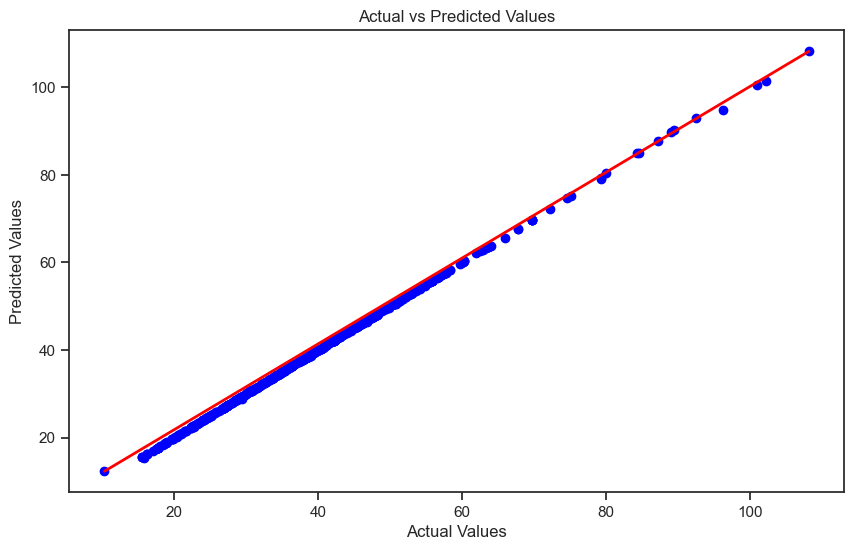

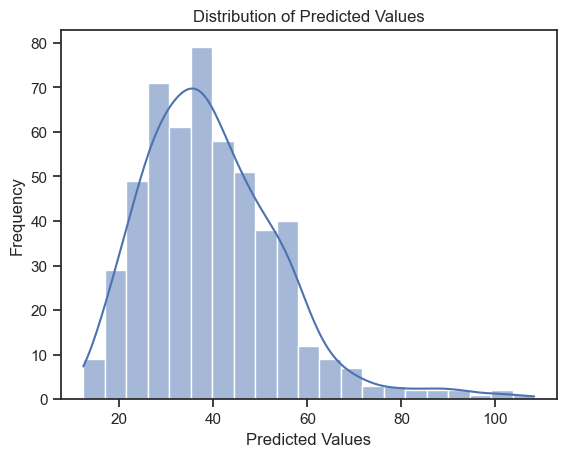

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X = pd.DataFrame(X, columns=df_jobs_re.columns[:-1])

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing for categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),  # Handle missing values in numerical columns
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)  # Handle missing values and encode categorical columns
    ],
    remainder='passthrough'  # Leave the rest of the columns untouched
)

# Create a pipeline that first preprocesses the data and then fits the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Now you can use the model to make predictions
y_pred = model.predict(X_test)

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.4f}")

# Plot the line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Visualize the distribution of predictions
sns.histplot(y_pred, kde=True)
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()
